In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#getting data
da=pd.read_csv("C:\Data sets\daily_forex_rates.csv")


In [3]:
#dataset overview
da.head()


,currency,base_currency,currency_name,exchange_rate,date
0,ZWL,EUR,Zimbabwean Dollar,349.807698,2024-01-28
1,GHS,EUR,Ghanaian Cedi,13.452894,2024-01-28
2,HRK,EUR,Croatian Kuna,7.474510,2024-01-28
3,HNL,EUR,Honduran Lempira,26.815795,2024-01-28
4,HKD,EUR,Hong Kong Dollar,8.488712,2024-01-28


In [4]:
da.tail()


,currency,base_currency,currency_name,exchange_rate,date
337151,CAD,EUR,Canadian Dollar,1.5913,2004-09-01
337152,JPY,EUR,Japanese Yen,132.8500,2004-08-31
337153,CAD,EUR,Canadian Dollar,1.5967,2004-08-31
337154,AUD,EUR,Australian Dollar,1.7296,2004-08-31
337155,AUD,EUR,Australian Dollar,1.7237,2004-08-30


In [5]:
da.columns


Index(['currency', 'base_currency', 'currency_name', 'exchange_rate', 'date'], dtype='object')

In [6]:
da.shape


(337156, 5)

In [7]:
da.dtypes


currency          object
base_currency     object
currency_name     object
exchange_rate    float64
date              object
dtype: object

In [8]:
da.index


RangeIndex(start=0, stop=337156, step=1)

In [9]:
da.info

<bound method DataFrame.info of        currency base_currency      currency_name  exchange_rate        date
0           ZWL           EUR  Zimbabwean Dollar     349.807698  2024-01-28
1           GHS           EUR      Ghanaian Cedi      13.452894  2024-01-28
2           HRK           EUR      Croatian Kuna       7.474510  2024-01-28
3           HNL           EUR   Honduran Lempira      26.815795  2024-01-28
4           HKD           EUR   Hong Kong Dollar       8.488712  2024-01-28
...         ...           ...                ...            ...         ...
337151      CAD           EUR    Canadian Dollar       1.591300  2004-09-01
337152      JPY           EUR       Japanese Yen     132.850000  2004-08-31
337153      CAD           EUR    Canadian Dollar       1.596700  2004-08-31
337154      AUD           EUR  Australian Dollar       1.729600  2004-08-31
337155      AUD           EUR  Australian Dollar       1.723700  2004-08-30

[337156 rows x 5 columns]>

In [10]:
#duplicates finding
da.duplicated().sum()


0

In [11]:
#found no duplicates
#selecting the countries in column which im working
columns_selected=['INR','AUD','USD','LKR' ]
df=da[da.currency. isin(columns_selected)]


In [12]:
df

,currency,base_currency,currency_name,exchange_rate,date
39,INR,EUR,Indian Rupee,90.299984,2024-01-28
55,AUD,EUR,Australian Dollar,1.651443,2024-01-28
107,USD,EUR,United States Dollar,1.086361,2024-01-28
128,LKR,EUR,Sri Lankan Rupee,345.471598,2024-01-28
180,AUD,EUR,Australian Dollar,1.652512,2024-01-27
...,...,...,...,...,...
337141,AUD,EUR,Australian Dollar,1.745900,2004-09-03
337146,AUD,EUR,Australian Dollar,1.747400,2004-09-02
337150,AUD,EUR,Australian Dollar,1.731500,2004-09-01
337154,AUD,EUR,Australian Dollar,1.729600,2004-08-31


In [13]:
#missing values
df.isna().sum()


currency         0
base_currency    0
currency_name    0
exchange_rate    0
date             0
dtype: int64

<Axes: >

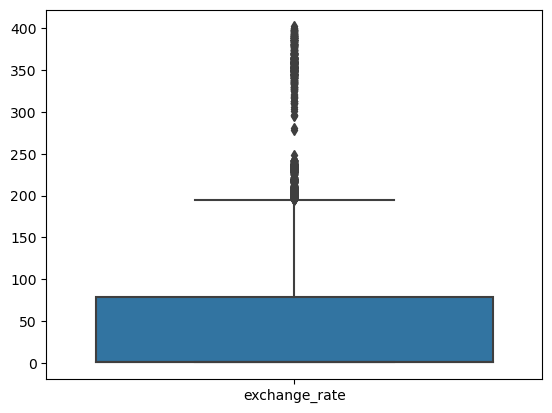

In [14]:
#outliers finding
sns.boxplot(df)

In [15]:
#we see that date column is not in time series, 
#so we need to convert in Time series
df['date'] = pd.to_datetime(df['date'])

In [16]:
df.dtypes

currency                 object
base_currency            object
currency_name            object
exchange_rate           float64
date             datetime64[ns]
dtype: object

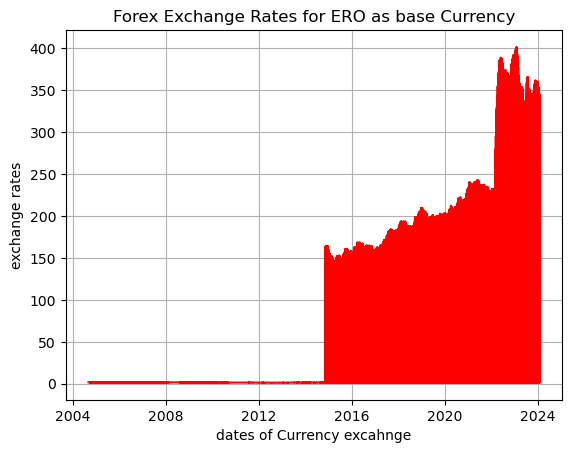

In [17]:
#visualization of exchanges happend on dates
x=df['date']
y=df['exchange_rate']
plt.plot(x,y, color='r')
plt.xlabel("dates of Currency excahnge")
plt.ylabel("exchange rates")
plt.title("Forex Exchange Rates for ERO as base Currency")
plt.grid()
plt.show()

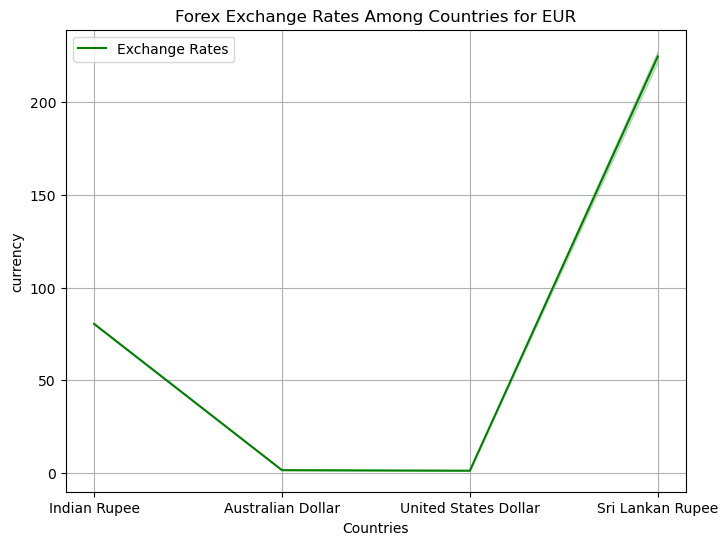

In [18]:
#visualization of currecny 
x=df['currency_name']
y=df['exchange_rate']
plt.figure(figsize=(8,6))
sns.lineplot(x=x, y=y, label='Exchange Rates', color='green')
plt.title("Forex Exchange Rates Among Countries for EUR")
plt.xlabel('Countries')
plt.ylabel('currency')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
df.reset_index(drop=True, inplace=True)
df

,currency,base_currency,currency_name,exchange_rate,date
0,INR,EUR,Indian Rupee,90.299984,2024-01-28
1,AUD,EUR,Australian Dollar,1.651443,2024-01-28
2,USD,EUR,United States Dollar,1.086361,2024-01-28
3,LKR,EUR,Sri Lankan Rupee,345.471598,2024-01-28
4,AUD,EUR,Australian Dollar,1.652512,2024-01-27
...,...,...,...,...,...
14893,AUD,EUR,Australian Dollar,1.745900,2004-09-03
14894,AUD,EUR,Australian Dollar,1.747400,2004-09-02
14895,AUD,EUR,Australian Dollar,1.731500,2004-09-01
14896,AUD,EUR,Australian Dollar,1.729600,2004-08-31


In [20]:
#we need them in the correct position
#Sort data by Date as it makes the every date of particular month to be fall in linewise.
df.sort_values(by='date', inplace=True)

In [21]:
df

,currency,base_currency,currency_name,exchange_rate,date
14897,AUD,EUR,Australian Dollar,1.723700,2004-08-30
14896,AUD,EUR,Australian Dollar,1.729600,2004-08-31
14895,AUD,EUR,Australian Dollar,1.731500,2004-09-01
14894,AUD,EUR,Australian Dollar,1.747400,2004-09-02
14893,AUD,EUR,Australian Dollar,1.745900,2004-09-03
...,...,...,...,...,...
4,AUD,EUR,Australian Dollar,1.652512,2024-01-27
3,LKR,EUR,Sri Lankan Rupee,345.471598,2024-01-28
2,USD,EUR,United States Dollar,1.086361,2024-01-28
1,AUD,EUR,Australian Dollar,1.651443,2024-01-28


In [22]:
#Pivoting the Data to have 'currency' as columns and 'exchange_rate' as values
#here dropna() is used to drop null values as at the specific years there was no trade 
#for the India and srilankha countries. so it fills as nan for those days.
dat= df.pivot(index='date', columns='currency', values='exchange_rate').dropna()


In [23]:
dat['date'] = dat.index
dat.reset_index(drop=True, inplace=True)


In [24]:
#descriptive statistics
dat.describe()


currency,AUD,INR,LKR,USD
count,2305.000000,2305.000000,2305.000000,2305.000000
mean,1.555186,80.308186,224.681519,1.123950
std,0.078723,6.463515,74.628937,0.054218
min,1.368900,65.948100,140.405000,0.959400
25%,1.490690,75.137900,164.577000,1.088500
50%,1.566650,79.853000,199.275000,1.120000
75%,1.616240,86.464400,235.723000,1.164970
max,1.887290,92.481649,401.854000,1.255300


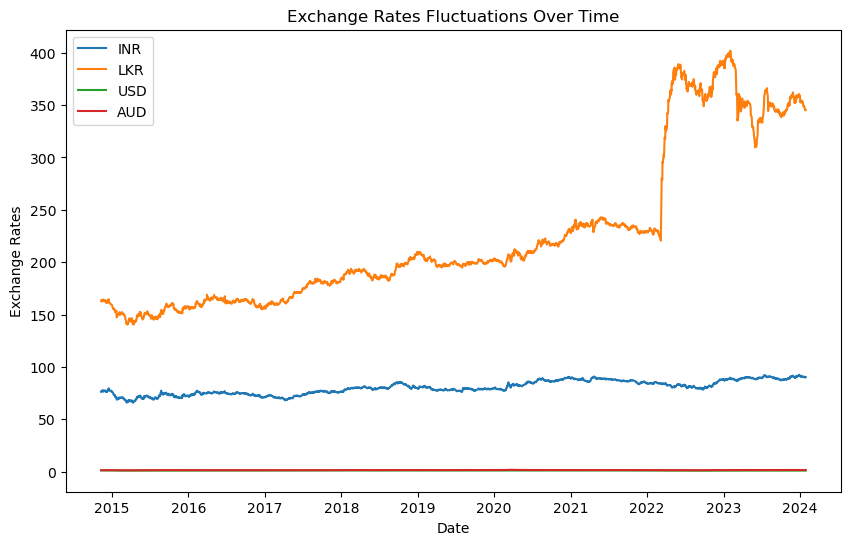

In [25]:
# Ploting of exchange rates over time
plt.figure(figsize=(10, 6))
for currency in ['INR', 'LKR', 'USD', 'AUD']:
    plt.plot(dat['date'], dat[currency], label=currency)
plt.xlabel('Date')
plt.ylabel('Exchange Rates')
plt.title('Exchange Rates Fluctuations Over Time')
plt.legend()
plt.show()

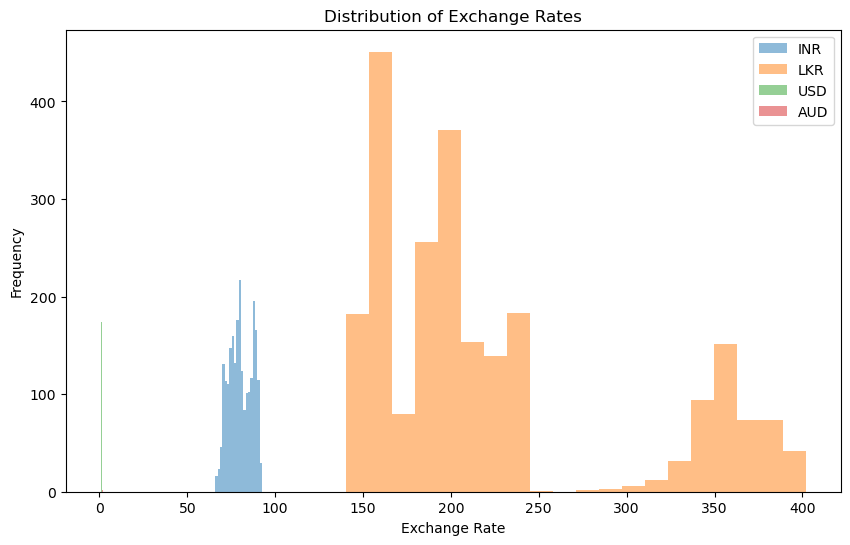

In [26]:
# Ploting distribution of exchange rates
plt.figure(figsize=(10, 6))
for currency in ['INR', 'LKR', 'USD', 'AUD']:
    plt.hist(dat[currency], bins=20, alpha=0.5, label=currency)
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Exchange Rates')
plt.legend()
plt.show()

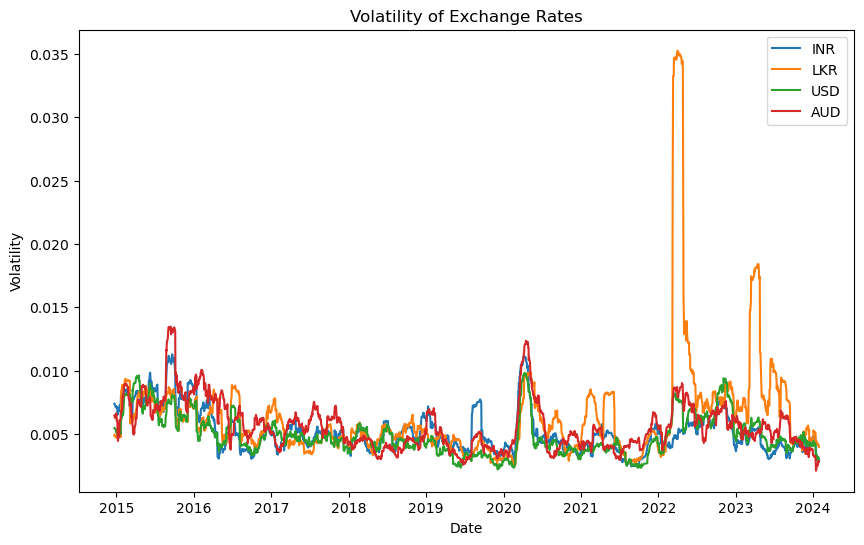

In [27]:
#volatility of exchange rates
volatility = dat[['INR', 'LKR', 'USD', 'AUD']].pct_change().rolling(window=30).std()

# Ploting volatility of exchange rates
plt.figure(figsize=(10, 6))
for currency in ['INR', 'LKR', 'USD', 'AUD']:
    plt.plot(dat['date'], volatility[currency], label=currency)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility of Exchange Rates')
plt.legend()
plt.show()


In [28]:
#currency for predicting future values, working on INR
target = ['INR','date']
target_dat = dat[target].copy()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
#Normalization
nor=MinMaxScaler()
scaled=nor.fit_transform(target_dat['INR'].values.reshape(-1, 1))

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [32]:
#Converting data to sequences
sequence_length = 10 
X, y = [], []
for i in range(len(scaled) - sequence_length):
    X.append(scaled[i:i+sequence_length])
    y.append(scaled[i+sequence_length])

X = np.array(X)
y = np.array(y)

In [33]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [34]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [35]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [36]:
#Training the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10

58/58 [==============================] - 8s 14ms/step - loss: 0.0260
Epoch 2/10
58/58 [==============================] - 1s 16ms/step - loss: 0.0012
Epoch 3/10
58/58 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 4/10
58/58 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 5/10
58/58 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 6/10
58/58 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 7/10
58/58 [==============================] - 1s 16ms/step - loss: 0.0011
Epoch 8/10
58/58 [==============================] - 1s 15ms/step - loss: 0.0011
Epoch 9/10
58/58 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 10/10
58/58 [==============================] - 1s 15ms/step - loss: 0.0011


In [37]:
#Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

15/15 [==============================] - 2s 7ms/step - loss: 9.1802e-04
Test Loss: 0.0009180158958770335


In [38]:
from sklearn.metrics import mean_squared_error

#Predict values
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)


15/15 [==============================] - 1s 6ms/step


In [39]:
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

Mean Squared Error (MSE): 0.0009
Root Mean Squared Error (RMSE): 0.0303


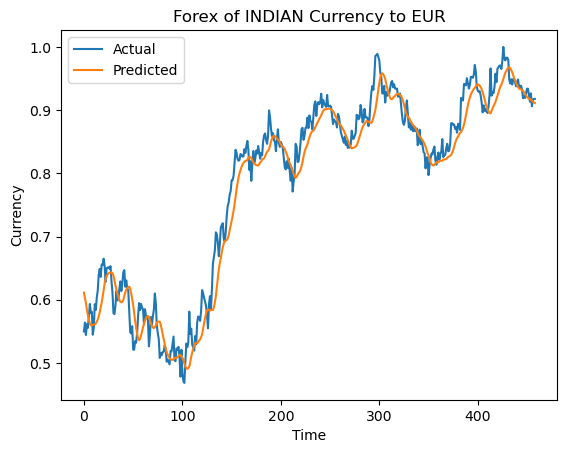

In [40]:
#Plot of actual vs predicted values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Currency')
plt.title("Forex of INDIAN Currency to EUR")
plt.legend()
plt.show()

In [41]:
predictions = model.predict(X_test)  
actual_values = y_test  

#first few predicted and actual values
for i in range(10): 
    print(f"Predicted: {predictions[i]}, Actual: {actual_values[i]}")


15/15 [==============================] - 0s 5ms/step
Predicted: [0.61123717], Actual: [0.55002065]
Predicted: [0.6029297], Actual: [0.56389743]
Predicted: [0.5946534], Actual: [0.54422422]
Predicted: [0.5843754], Actual: [0.56143262]
Predicted: [0.5761714], Actual: [0.55553443]
Predicted: [0.5680074], Actual: [0.57450287]
Predicted: [0.5623122], Actual: [0.59334694]
Predicted: [0.5596979], Actual: [0.5792478]
Predicted: [0.559302], Actual: [0.58094]
Predicted: [0.5603174], Actual: [0.5447707]
